# Import Libraries

In [17]:
import os 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from datetime import datetime
from itertools import product
from scipy import stats
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller, kpss
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import warnings
plt.style.use('ggplot')
warnings.filterwarnings("ignore")

# Load Data

In [18]:
df = pd.read_csv('./aggregated_df_final29sep2021.csv')
df.shape

(702, 30)

In [19]:
df.describe(include= 'all')

,time,open_x,high_x,low_x,close_x,Basis_x,Volume_x,RSI_x,MACD_x,OnBalanceVolume_x,...,btc_s2f,btc_s2f_price,nlp_compound,nlp_subjectivity,nlp_polarity,sentiment_Extreme Fear,sentiment_Extreme Greed,sentiment_Fear,sentiment_Greed,sentiment_Neutral
count,702,702.000000,702.000000,702.000000,702.000000,702.000000,7.020000e+02,702.000000,702.000000,7.020000e+02,...,702.000000,702.000000,702.000000,702.000000,702.000000,702.000000,702.000000,702.000000,702.000000,702.000000
unique,702,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,2019-07-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,9879.275344,10212.891894,9514.886220,9906.117841,9739.666744,3.422374e+07,32.480121,104.423126,1.104086e+08,...,37.911445,60479.432221,0.127084,0.354570,0.089287,0.219373,0.122507,0.351852,0.205128,0.101140
std,NaN,10633.569674,11016.584337,10191.465075,10649.784200,10477.125601,6.140338e+07,10.082487,731.465774,5.521676e+08,...,16.414425,89197.804950,0.128166,0.083757,0.065128,0.414117,0.328104,0.477889,0.404083,0.301728
min,NaN,1815.048695,1927.264117,1810.275036,1856.236451,1969.454284,7.156850e+04,5.901871,-3425.174516,-2.119188e+09,...,19.075391,3186.316453,-0.337929,0.033333,-0.187500,0.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,3878.277344,4012.658199,3749.587338,3860.294147,3874.564174,9.588812e+05,25.144811,-122.473197,-3.148938e+07,...,25.289452,8218.161881,0.055872,0.301122,0.051533,0.000000,0.000000,0.000000,0.000000,0.000000
50%,NaN,5259.702138,5360.444375,5123.801562,5246.465313,5243.186484,6.088148e+06,31.522780,14.050812,3.591448e+07,...,28.324179,12026.713046,0.131786,0.344163,0.083143,0.000000,0.000000,0.000000,0.000000,0.000000
75%,NaN,8067.289062,8213.998594,7757.880625,8079.958906,8013.770172,3.110888e+07,38.755728,215.511291,2.838719e+08,...,53.753036,103526.677194,0.207088,0.406142,0.123550,0.000000,0.000000,1.000000,0.000000,0.000000


In [20]:
df.head(2)

,time,open_x,high_x,low_x,close_x,Basis_x,Volume_x,RSI_x,MACD_x,OnBalanceVolume_x,...,btc_s2f,btc_s2f_price,nlp_compound,nlp_subjectivity,nlp_polarity,sentiment_Extreme Fear,sentiment_Extreme Greed,sentiment_Fear,sentiment_Greed,sentiment_Neutral
0,2021-05-04,42774.461875,42859.831250,39810.56,39889.26750,38095.884875,2.103081e+08,30.197215,-289.288887,6.627343e+07,...,45.287975,58210.414847,0.231400,0.334341,0.061957,0,0,0,1,0
1,2021-05-05,39888.854375,43487.158125,39674.55,43073.27375,37899.245281,1.928531e+08,36.635091,-152.584587,2.591266e+08,...,52.213717,93897.589556,0.059515,0.285068,0.079156,0,0,0,0,1


In [21]:
df.head(2).transpose()

,0,1
time,2021-05-04,2021-05-05
open_x,42774.5,39888.9
high_x,42859.8,43487.2
low_x,39810.6,39674.6
close_x,39889.3,43073.3
Basis_x,38095.9,37899.2
Volume_x,2.10308e+08,1.92853e+08
RSI_x,30.1972,36.6351
MACD_x,-289.289,-152.585
OnBalanceVolume_x,6.62734e+07,2.59127e+08


# Extract relevant features
 - set the 'time' column as index of the data
 - extract relevant features for time series analysis

In [22]:
df = df.set_index('time')
df.head(2)

,open_x,high_x,low_x,close_x,Basis_x,Volume_x,RSI_x,MACD_x,OnBalanceVolume_x,btc_dom,...,btc_s2f,btc_s2f_price,nlp_compound,nlp_subjectivity,nlp_polarity,sentiment_Extreme Fear,sentiment_Extreme Greed,sentiment_Fear,sentiment_Greed,sentiment_Neutral
time,,,,,,,,,,,,,,,,,,,,,
2021-05-04,42774.461875,42859.831250,39810.56,39889.26750,38095.884875,2.103081e+08,30.197215,-289.288887,6.627343e+07,47.051815,...,45.287975,58210.414847,0.231400,0.334341,0.061957,0,0,0,1,0
2021-05-05,39888.854375,43487.158125,39674.55,43073.27375,37899.245281,1.928531e+08,36.635091,-152.584587,2.591266e+08,46.368421,...,52.213717,93897.589556,0.059515,0.285068,0.079156,0,0,0,0,1


In [23]:
df = df.loc[:,['close_x', 'btc_s2f', 'btc_s2f_price']]
df.head(5)

,close_x,btc_s2f,btc_s2f_price
time,,,
2021-05-04,39889.267500,45.287975,58210.414847
2021-05-05,43073.273750,52.213717,93897.589556
2021-05-06,42298.459375,48.223643,71887.239253
2021-05-13,37256.128750,50.940033,86420.573342
2021-05-17,32654.088750,67.791261,225757.314177


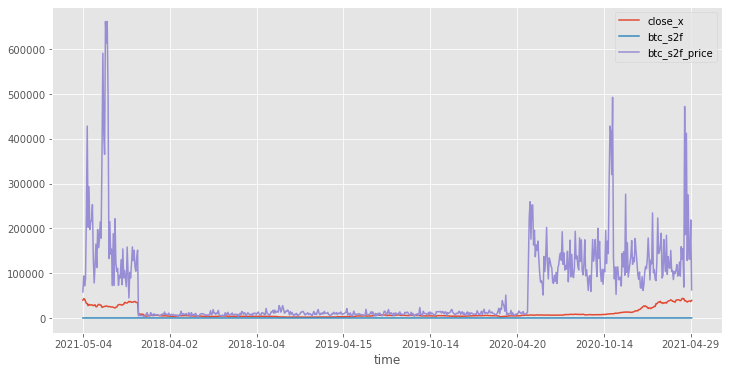

In [24]:
# Plotting movement of OHLC over the period 2017-2021
df.loc[:,df.columns].plot(figsize = (12,6))

In [25]:
# Converting index to datetime format
df.index = pd.to_datetime(df.index)
df.head(5)

,close_x,btc_s2f,btc_s2f_price
time,,,
2021-05-04,39889.267500,45.287975,58210.414847
2021-05-05,43073.273750,52.213717,93897.589556
2021-05-06,42298.459375,48.223643,71887.239253
2021-05-13,37256.128750,50.940033,86420.573342
2021-05-17,32654.088750,67.791261,225757.314177


# Resampling
 - daily frequency
 - monthly frequency
 - annual frequency
 - quarterly frequency

In [26]:
# Resampling to daily frequency
df_day = df.resample('D').mean()

# Resampling to monthly frequency
df_month = df.resample('M').mean()

# Resampling to annual frequency
df_year = df.resample('A-DEC').mean()

# Resampling to quarterly frequency
df_quarter = df.resample('Q-DEC').mean()

In [27]:
len(df_day.close_x)

1347

In [28]:
# temporary check
pd.Series(df.close_x.isnull().index).apply(lambda x: x.year).value_counts()

2020    201
2019    198
2018    180
2021    123
Name: time, dtype: int64

In [29]:
display(df_day.head(3), df_month.head(3), df_year.head(3), df_quarter.head(3))

,close_x,btc_s2f,btc_s2f_price
time,,,
2018-01-02,7967.194375,21.505710,4767.370100
2018-01-03,8622.474927,23.426156,6354.679276
2018-01-04,8538.721249,21.895041,5063.605777


,close_x,btc_s2f,btc_s2f_price
time,,,
2018-01-31,8202.762372,21.812713,5062.562003
2018-02-28,5218.119208,23.998750,7214.086080
2018-03-31,5064.172895,24.887915,7932.706402


,close_x,btc_s2f,btc_s2f_price
time,,,
2018-12-31,4136.291974,25.683106,9186.315138
2019-12-31,4150.195531,26.471871,9936.894387
2020-12-31,7384.949963,46.983625,92876.634716


,close_x,btc_s2f,btc_s2f_price
time,,,
2018-03-31,5734.322193,23.944173,7095.159310
2018-06-30,4339.071440,24.550799,7684.921859
2018-09-30,3816.316029,25.569326,8852.519599


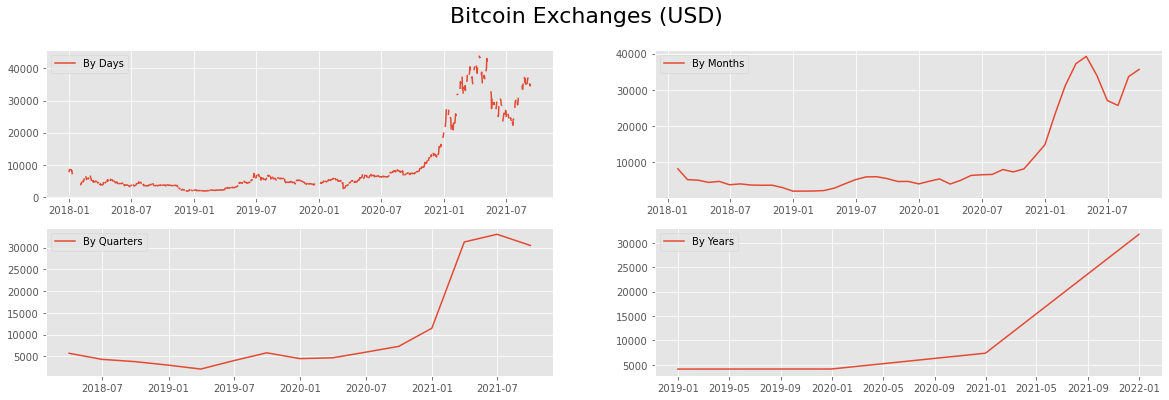

In [30]:
# Plotting subplots of OHLC by days, months, quarters and years
fig = plt.figure(figsize=[20,6])
plt.suptitle('Bitcoin Exchanges (USD)', fontsize=22)

plt.subplot(221)
plt.plot(df_day.close_x, '-', label='By Days')
plt.legend()

plt.subplot(222)
plt.plot(df_month.close_x, '-', label='By Months')
plt.legend()

plt.subplot(223)
plt.plot(df_quarter.close_x, '-', label='By Quarters')
plt.legend()

plt.subplot(224)
plt.plot(df_year.close_x, '-', label='By Years')
plt.legend()

plt.show()

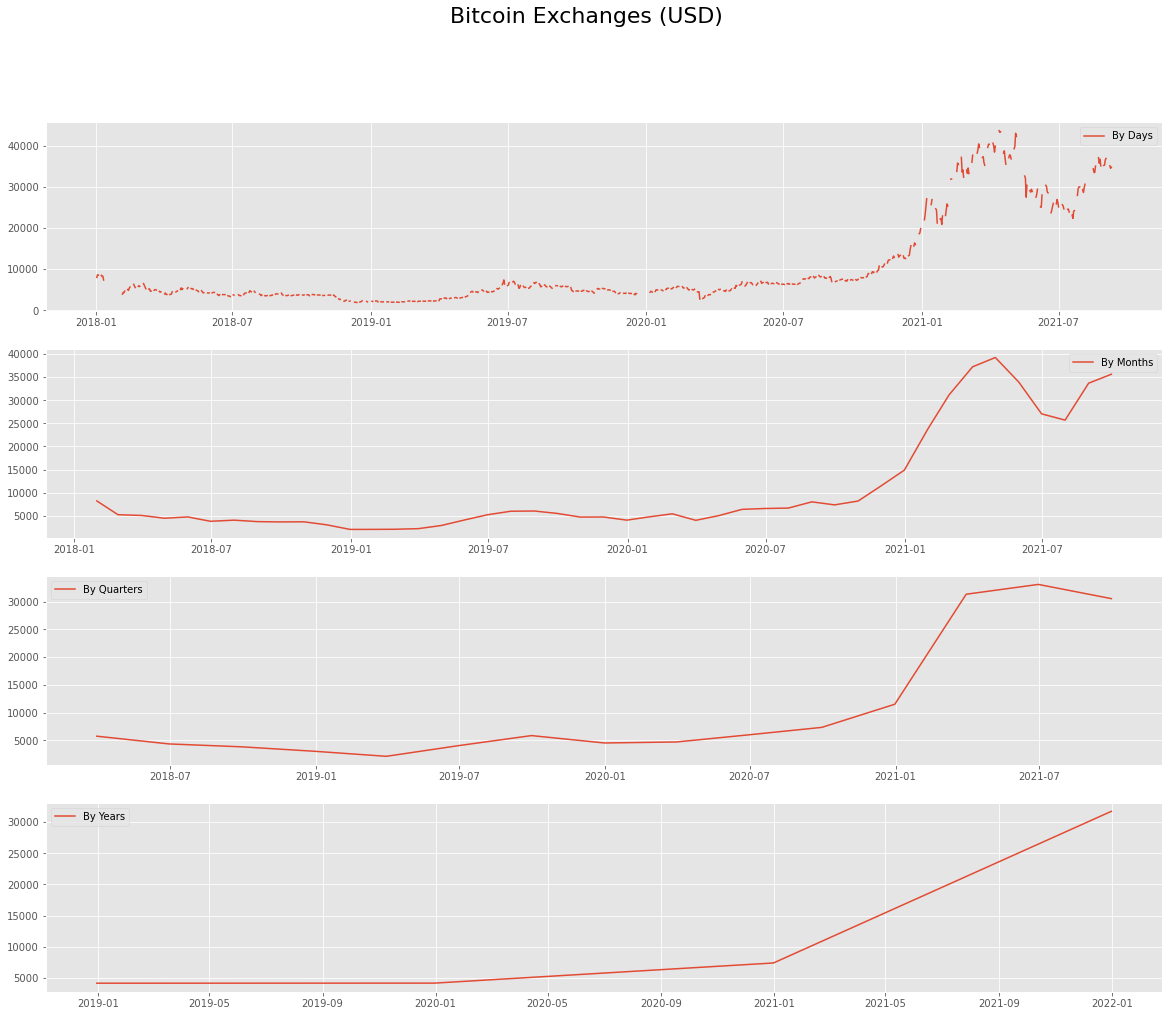

In [31]:
# Plotting subplots of OHLC by days, months, quarters and years
fig = plt.figure(figsize=[20,16])
plt.suptitle('Bitcoin Exchanges (USD)', fontsize=22)

plt.subplot(411)
plt.plot(df_day.close_x, '-', label='By Days')
plt.legend()

plt.subplot(412)
plt.plot(df_month.close_x, '-', label='By Months')
plt.legend()

plt.subplot(413)
plt.plot(df_quarter.close_x, '-', label='By Quarters')
plt.legend()

plt.subplot(414)
plt.plot(df_year.close_x, '-', label='By Years')
plt.legend()

plt.show()

# Check Stationarity

Dickey–Fuller test: p=0.945137


<Figure size 864x432 with 0 Axes>

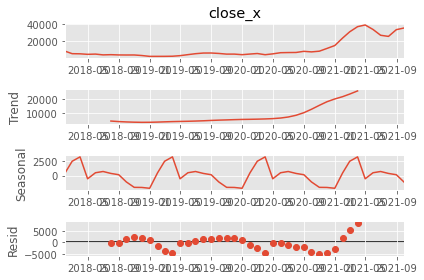

In [32]:
# Checking Stationarity 
plt.figure(figsize=(12,6))
sm.tsa.seasonal_decompose(df_month.close_x).plot()
print("Dickey–Fuller test: p=%f" % sm.tsa.stattools.adfuller(df_month.close_x)[1])
plt.show()

From the p-value of Dickey-Fuller test, we conclude that the series is not stationary.

Dickey–Fuller test: p=0.975818


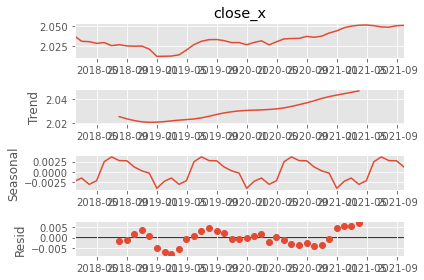

In [33]:
# Box-Cox Transformations & Checking Stationarity 
df_month['close_x'], lmbda = stats.boxcox(df_month.close_x)
print("Dickey–Fuller test: p=%f" % sm.tsa.stattools.adfuller(df_month.close_x)[1])
sm.tsa.seasonal_decompose(df_month.close_x).plot();

Time series data still not stationary

# Initial approximation
 - Autocorrelation
 - Partial Autocorrelation Plots

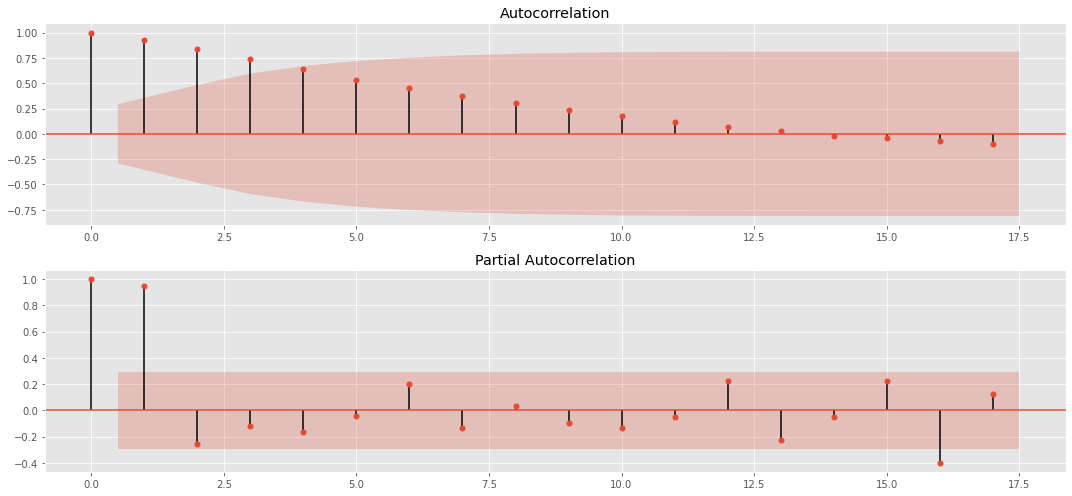

In [34]:
# Initial approximation of parameters using Autocorrelation and Partial Autocorrelation Plots

plt.figure(figsize=(15,7))

ax = plt.subplot(211)
sm.graphics.tsa.plot_acf(df_month.close_x, ax=ax)

ax = plt.subplot(212)
sm.graphics.tsa.plot_pacf(df_month.close_x, ax=ax)

plt.tight_layout()
plt.show()

As seen in the preceding figure, the partial autocorrelation only at lag one is statistically significant while for rest the lags it is within the 95% confidence intervals. Hence, for BTC close values the order of AR models is one.

In [35]:
# Initial approximation of parameters
Qs = range(0, 2)
qs = range(0, 3)
Ps = range(0, 3)
ps = range(0, 3)
D=1
d=1
parameters = product(ps, qs, Ps, Qs)
parameters_list = list(parameters)
len(parameters_list)

54

In [36]:
# Model Selection

results = []
best_aic = float("inf")
warnings.filterwarnings('ignore')
for param in parameters_list:
    try:
        model=sm.tsa.statespace.SARIMAX(df_month.close_x, order=(param[0], d, param[1]), 
                                        seasonal_order=(param[2], D, param[3], 12)).fit(disp=-1)
    except ValueError:
        print('wrong parameters:', param)
        continue
    aic = model.aic
    if aic < best_aic:
        best_model = model
        best_aic = aic
        best_param = param
    results.append([param, model.aic])

In [37]:
results[0:10]

[[(0, 0, 0, 0), -260.98716540134876],
 [(0, 0, 0, 1), -258.98725405561424],
 [(0, 0, 1, 0), -259.2486285577361],
 [(0, 0, 1, 1), -256.9872758856103],
 [(0, 0, 2, 0), -259.5936039809443],
 [(0, 0, 2, 1), -254.98709939079538],
 [(0, 1, 0, 0), -264.14821919886367],
 [(0, 1, 0, 1), -262.14799353305807],
 [(0, 1, 1, 0), -262.16280892396423],
 [(0, 1, 1, 1), -260.14800074369305]]

In [38]:
# Best Models

result_table = pd.DataFrame(results)
result_table.columns = ['parameters', 'aic']
display(result_table.sort_values(by = 'aic', ascending=True).head())
display(best_model.summary())

,parameters,aic
18,"(1, 0, 0, 0)",-267.678761
36,"(2, 0, 0, 0)",-266.350002
22,"(1, 0, 2, 0)",-265.927046
20,"(1, 0, 1, 0)",-265.766511
24,"(1, 1, 0, 0)",-265.704132


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                            close_x   No. Observations:                   45
Model:             SARIMAX(1, 1, 0)x(0, 1, 0, 12)   Log Likelihood                 135.839
Date:                            Fri, 01 Oct 2021   AIC                           -267.679
Time:                                    13:55:29   BIC                           -264.747
Sample:                                01-31-2018   HQIC                          -266.707
                                     - 09-30-2021                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4742      0.171      2.774      0.006       0.139       0.809
sigma2      1.192e-05    3.2e-06      3.728      0.000    5.65e-06    1.82e-05
===================================================================================
Ljung-Box (Q):                       19.09   Jarque-Bera (JB):                 0.12
Prob(Q):                              0.95   Prob(JB):                         0.94
Heteroskedasticity (H):               0.61   Skew:                            -0.12
Prob(H) (two-sided):                  0.42   Kurtosis:                         2.81
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Dickey–Fuller test:: p=0.000000


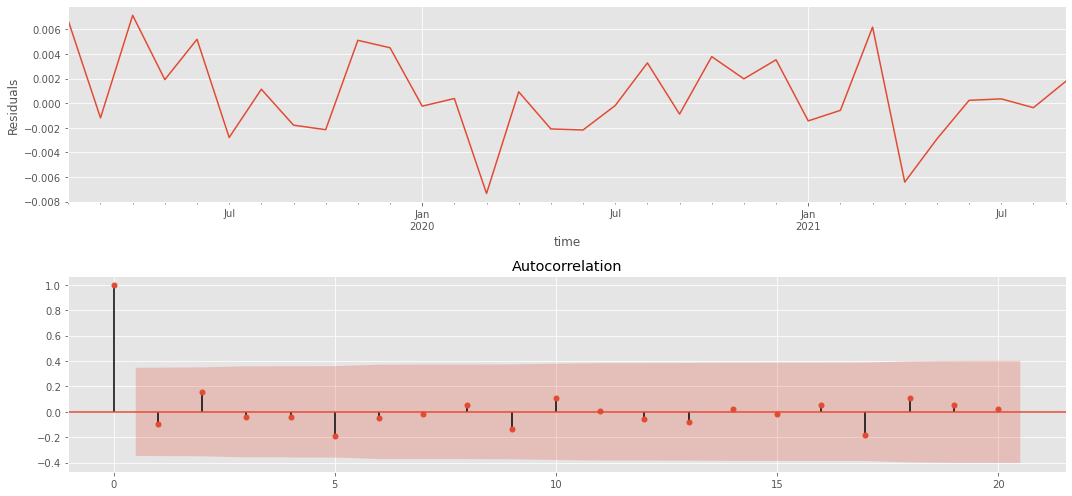

In [39]:
# STL-decomposition

plt.figure(figsize=(15,7))

plt.subplot(211)
best_model.resid[13:].plot()
plt.ylabel(u'Residuals')

ax = plt.subplot(212)
sm.graphics.tsa.plot_acf(best_model.resid[13:].values.squeeze(), lags=20, ax=ax)

print("Dickey–Fuller test:: p=%f" % sm.tsa.stattools.adfuller(best_model.resid)[1])

plt.tight_layout()
plt.show()

In [40]:
# Inverse Box-Cox Transformation Function

def invboxcox(y,lmbda):
    if lmbda == 0:
        return(np.exp(y))
    else:
        return(np.exp(np.log(lmbda*y+1)/lmbda))

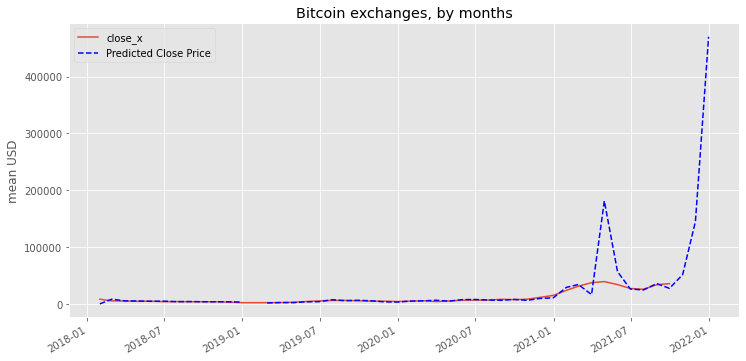

In [41]:
# Prediction

df_month2 = df_month[['close_x']]
df_month2.close_x = df_month2.close_x.apply(lambda x: invboxcox(x, lmbda))
date_list = [datetime(2021, 9, 30), datetime(2021, 10, 31), datetime(2021, 11, 30), datetime(2021, 12, 31)]
future = pd.DataFrame(index=date_list, columns= df_month.columns)
df_month2 = pd.concat([df_month2, future])
df_month2['forecast'] = invboxcox(best_model.predict(start=0, end=75), lmbda)
plt.figure(figsize=(12,6))
df_month2.close_x.plot()
df_month2.forecast.plot(color='b', ls='--', label='Predicted Close Price')
plt.legend()
plt.title('Bitcoin exchanges, by months')
plt.ylabel('mean USD')
plt.show()


# Evaluation

In [42]:
df_month2.head(5)

,close_x,btc_s2f,btc_s2f_price,forecast
2018-01-31,8202.762372,NaN,NaN,1.000000
2018-02-28,5218.119208,NaN,NaN,8202.762377
2018-03-31,5064.172895,NaN,NaN,5218.119209
2018-04-30,4456.796149,NaN,NaN,5064.172895
2018-05-31,4738.561035,NaN,NaN,4456.796149


In [43]:
df_month2[['close_x', 'forecast']].dropna().head(5)

,close_x,forecast
2018-01-31,8202.762372,1.000000
2018-02-28,5218.119208,8202.762377
2018-03-31,5064.172895,5218.119209
2018-04-30,4456.796149,5064.172895
2018-05-31,4738.561035,4456.796149


In [44]:
df_month2[df_month2['close_x'].isnull()]

,close_x,btc_s2f,btc_s2f_price,forecast
2021-09-30,NaN,NaN,NaN,27287.060981
2021-10-31,NaN,NaN,NaN,51405.384545
2021-11-30,NaN,NaN,NaN,144835.401249
2021-12-31,NaN,NaN,NaN,470256.284801


In [45]:
df_month2[df_month2['forecast'].isnull()]

,close_x,btc_s2f,btc_s2f_price,forecast
2019-01-31,2049.271844,NaN,NaN,NaN


In [46]:
import math
from sklearn.metrics import mean_squared_error

df_month3 = df_month2[['close_x', 'forecast']].dropna()
s_a = df_month3['close_x']
s_b = df_month3['forecast']

mean_squared_error(s_a.values, s_b.values)

485210789.94330335

# Graphing
 - only without null

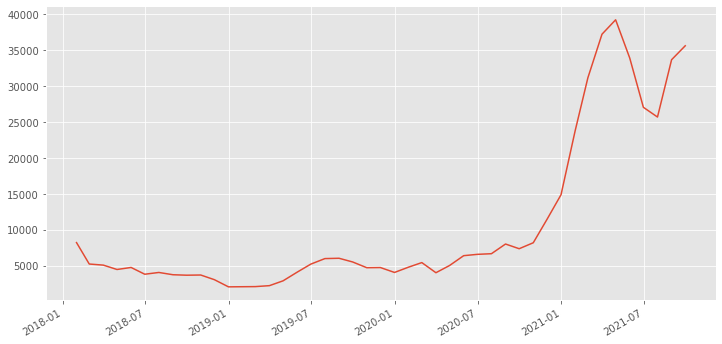

In [47]:
plt.figure(figsize=(12,6))
df_month3.close_x.plot()

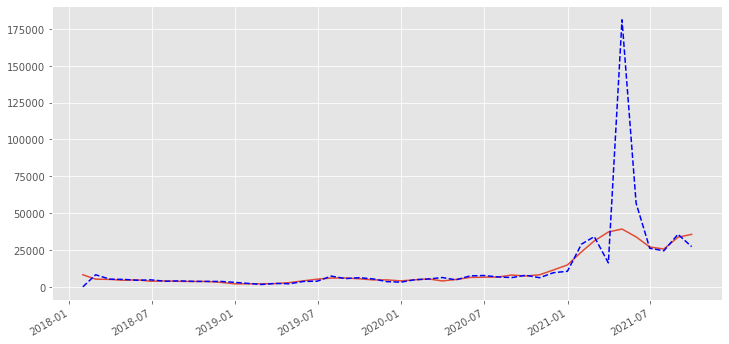

In [48]:
plt.figure(figsize=(12,6))
df_month3.close_x.plot()
df_month3.forecast.plot(color='b', ls='--', label='Predicted Close Price')

In [49]:
df_month3.forecast.describe()

count        44.000000
mean      13835.444305
std       28229.547944
min           1.000000
25%        3779.145159
50%        5479.804891
75%        8546.815192
max      181188.797464
Name: forecast, dtype: float64

In [50]:
df_month3.forecast.sort_values(ascending=False)

2021-04-30    181188.797464
2021-05-31     56740.015623
2021-08-31     35652.062754
2021-02-28     34052.592081
2021-01-31     29002.676196
2021-09-30     27287.060981
2021-06-30     26166.024612
2021-07-31     24481.114427
2021-03-31     16282.960062
2020-12-31     10562.506864
2020-11-30      9578.973638
2018-02-28      8202.762377
2020-09-30      7862.111940
2020-06-30      7705.063022
2020-05-31      7424.157511
2019-07-31      7281.672669
2020-07-31      6744.436929
2020-03-31      6323.320791
2020-08-31      6290.000040
2019-09-30      6201.564494
2020-10-31      6188.864287
2019-08-31      5580.550730
2019-10-31      5379.059052
2020-02-29      5286.414018
2018-03-31      5218.119209
2018-04-30      5064.172895
2020-01-31      4856.691120
2018-06-30      4738.561035
2020-04-30      4735.398211
2018-05-31      4456.796149
2018-08-31      4043.096755
2019-06-30      3834.837804
2018-07-31      3796.889037
2018-09-30      3725.913522
2018-11-30      3687.898353
2019-05-31      3676

In [51]:
df_month4 = df_month3[df_month3['forecast']!=max(df_month3.forecast)]
df_month4.head(5)

,close_x,forecast
2018-01-31,8202.762372,1.000000
2018-02-28,5218.119208,8202.762377
2018-03-31,5064.172895,5218.119209
2018-04-30,4456.796149,5064.172895
2018-05-31,4738.561035,4456.796149


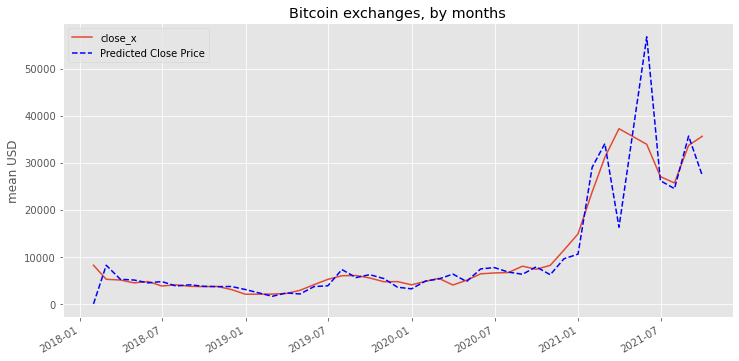

In [52]:
plt.figure(figsize=(12,6))
df_month4.close_x.plot()
df_month4.forecast.plot(color='b', ls='--', label='Predicted Close Price')
plt.legend()
plt.title('Bitcoin exchanges, by months')
plt.ylabel('mean USD')
plt.show()

In [53]:
df

,close_x,btc_s2f,btc_s2f_price
time,,,
2021-05-04,39889.267500,45.287975,58210.414847
2021-05-05,43073.273750,52.213717,93897.589556
2021-05-06,42298.459375,48.223643,71887.239253
2021-05-13,37256.128750,50.940033,86420.573342
2021-05-17,32654.088750,67.791261,225757.314177
...,...,...,...
2021-04-26,37123.436875,71.885049,274918.363206
2021-04-27,37822.023125,57.705172,131395.253570
2021-04-28,37699.113750,57.707912,131416.215713
